In [58]:
import os
import pandas as pd
os.chdir('C:/Users/박지원/Desktop/파이썬 머신러닝 ch.3')
print(os.getcwd())
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

C:\Users\박지원\Desktop\파이썬 머신러닝 ch.3


### 선형 회귀 

In [17]:
dataset=pd.read_csv('wave.csv')
print(dataset.head())
print(dataset.shape)

       x      y
0 -0.753 -0.448
1  2.700  0.331
2  1.390  0.779
3  0.592  0.035
4 -2.060 -1.390
(40, 2)


In [18]:
x = dataset.iloc[:, 0] #독립변수
y = dataset.iloc[:, 1] #종속변수
print(x.head())
print(x.shape)

0   -0.753
1    2.700
2    1.390
3    0.592
4   -2.060
Name: x, dtype: float64
(40,)


In [19]:
print(y.head())
print(y.shape)

0   -0.448
1    0.331
2    0.779
3    0.035
4   -1.390
Name: y, dtype: float64
(40,)


In [20]:
#x축이 한 개인 것을 2차원으로 변형 , 행의 -1은 기존의 행 수
x=x.values.reshape(-1,1)
print(x.shape)

(40, 1)


In [22]:
x_train, x_test,y_train,y_test = train_test_split(x,y,random_state=0)

In [23]:
Ir = LinearRegression().fit(x_train,y_train)

In [26]:
print('기울기:',Ir.coef_)
print('절편:',Ir.intercept_)

기울기: [0.52468771]
절편: -0.09370435583146064


In [27]:
print('훈련 데이터 점수:',Ir.score(x_train, y_train))
print('테스트 데이터 점수:',Ir.score(x_test, y_test)) # 두 값의 차이가 크게 없음
print('테스트 데이터 점수(반올림):', round(Ir.score(x_test,y_test),3))

훈련 데이터 점수: 0.688664719797307
테스트 데이터 점수: 0.6249237531352055
테스트 데이터 점수(반올림): 0.625


In [29]:
#1개 데이터 예측 - x_train에 사용된 것과 포맷 맞추기
print(x_train.shape)
x_new=np.array([[2.9]])
result = Ir.predict(x_new)
print(result)

(30, 1)
[1.42789001]


#### 연습문제 1 - 독립변수가 '2.9'인 경우와 '2.7'인 경우를 한 번에 예측하시오.

In [38]:
a_new = np.array([[2.9,2.7]]).T #행렬전치 -> 형태 맞춰주기
result = Ir.predict(a_new)
print(result)

[1.42789001 1.32295247]


#### 연습문제 2 - 독립변수가 104개인 가상의 데이터에 대해 회귀분석 수행

In [95]:
reg = pd.read_csv('reg.csv')
print(reg.head())

         x1    x2      x3   x4     x5     x6     x7     x8      x9     x10  \
0  0.000000  0.18  0.0678  0.0  0.315  0.578  0.642  0.269  0.0000  0.2080   
1  0.000236  0.00  0.2420  0.0  0.173  0.548  0.783  0.349  0.0435  0.1050   
2  0.000236  0.00  0.2420  0.0  0.173  0.694  0.599  0.349  0.0435  0.1050   
3  0.000293  0.00  0.0630  0.0  0.150  0.659  0.442  0.449  0.0870  0.0668   
4  0.000705  0.00  0.0630  0.0  0.150  0.687  0.528  0.449  0.0870  0.0668   

   ...     x96     x97      x98     x99   x100    x101   x102    x103  \
0  ...  0.0597  0.2080  0.01870  0.0825  0.287  0.0258  1.000  0.0897   
1  ...  0.0581  0.1050  0.02150  0.3060  0.553  0.1130  1.000  0.2040   
2  ...  0.0581  0.1040  0.00666  0.3060  0.548  0.0351  0.980  0.0628   
3  ...  0.0433  0.0664  0.00223  0.4210  0.645  0.0217  0.989  0.0332   
4  ...  0.0433  0.0668  0.00664  0.4210  0.649  0.0645  1.000  0.0993   

      x104     y  
0  0.00804  24.0  
1  0.04180  21.6  
2  0.00403  34.7  
3  0.00111  33.4

In [94]:
print(reg.shape)
x=reg.iloc[:,:104]
y=reg.iloc[:,104]
print(x.shape)
print(y.shape)

(506, 105)
(506, 104)
(506,)


In [49]:
# test 데이터와 train 데이터로 쪼개기 
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [53]:
Ir = LinearRegression().fit(x_train,y_train)
print('기울기:', Ir.coef_)
print('절편:',Ir.intercept_)

기울기: [-3.67284384e+02 -5.39870613e+01 -1.24554505e+02 -1.26186152e+01
 -1.67919016e+01  2.76526885e+01  5.39053364e+01 -4.33652020e+01
  2.89751049e+01  3.27436811e+01 -1.12176799e+01 -1.47411158e+01
 -2.08455616e+01  1.29884773e+01  3.09392988e+03  1.11820660e+03
  1.14523638e+02 -1.88814537e+01  3.80593914e+01 -2.52969880e+01
  6.54487395e+01  8.10994660e+02 -1.45678176e+03  1.69274176e+02
 -4.03612390e+00  4.40769399e+01 -1.25952433e+01 -1.92269785e+01
 -2.63059461e+00 -8.26717171e+01  9.43381132e+00  4.99972835e+00
 -1.65137878e+00 -8.35947375e+00  3.43667871e+01 -1.17489862e+01
  7.01362825e+01 -1.64077644e+01  4.29093465e+01  1.76515932e+00
 -7.43390483e+00  5.21359093e+01  1.63901385e+01  5.11928066e+01
 -3.65044507e+01  1.84784623e+01 -1.47849877e+01  5.80037019e+01
 -1.25124793e+01 -1.26186152e+01 -1.73173347e+01 -3.36500848e+01
  7.34368733e+00 -7.40329636e+00  1.69262358e+01 -1.30999005e+01
 -1.16289764e+01  5.76004098e+01 -1.77069129e+01  4.04198483e+00
  2.94794320e+01 -1.

In [54]:
print('훈련 데이터 점수:', Ir.score(x_train,y_train))
print('테스터 데이터 점수:',Ir.score(x_test,y_test))
# 차이가 많이 남 -> 모델이 과대적합 되었다.

훈련 데이터 점수: 0.9520916012883632
테스터 데이터 점수: 0.6079900265088932


### 리지 회귀

In [57]:
from sklearn.linear_model import Ridge # 모델명을 ridge로 수정
ridge = Ridge().fit(x_train,y_train)
print('훈련 데이터 점수:', ridge.score(x_train,y_train))
print('테스트 데이터 점수', ridge.score(x_test,y_test))

훈련 데이터 점수: 0.8857035621419065
테스트 데이터 점수 0.7528777580552187


C:\anaconda\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.39923e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


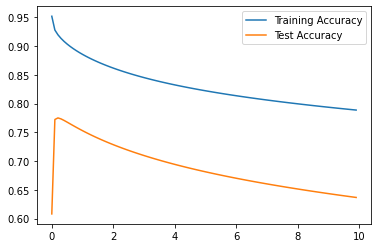

In [61]:
#최적의 alpha 찾기
train_accuracy = []
test_accuracy = []     # 결과를 받는 빈 리스트
alphas = np.arange(start =0,stop =10 , step = 0.1) # 0~10까지 0.1 단위로 변경

for alpha in alphas : 
    ridge = Ridge(alpha = alpha).fit(x_train,y_train)      # alpha 값 변경
    train_accuracy.append(ridge.score(x_train,y_train))    # 훈련 정확도 저장
    test_accuracy.append(ridge.score(x_test,y_test))       # 테스트 정확도 저장
    
plt.plot(alphas, train_accuracy, label = 'Training Accuracy') # 훈련 정확도
plt.plot(alphas, test_accuracy, label = 'Test Accuracy') # 테스트 정확도
plt.legend()
plt.show()

### 라소 회귀

In [62]:
from sklearn.linear_model import Lasso #모델명을 Lasso로 변경
lasso = Lasso().fit(x_train, y_train) 

In [63]:
print('훈련 데이터 점수:', lasso.score(x_train, y_train))
print('테스트 데이터 점수:',lasso.score(x_test,y_test))

훈련 데이터 점수: 0.2932077872644063
테스트 데이터 점수: 0.20935610983894315


In [66]:
# alpha 값 줄여서 확인해보기 
lasso = Lasso(alpha = 0.1).fit(x_train,y_train)
print('훈련 데이터 점수:', lasso.score(x_train, y_train))
print('테스트 데이터 점수:',lasso.score(x_test,y_test))

훈련 데이터 점수: 0.77094949101076
테스트 데이터 점수: 0.6303135818440678


### 엘라스틱넷

In [69]:
from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet(alpha = 0.2, l1_ratio = 0.2).fit(x_train,y_train)

In [70]:
print('훈련 데이터 점수:',elasticnet.score(x_train,y_train))
print('테스트 데이터 점수:',elasticnet.score(x_test,y_test))

훈련 데이터 점수: 0.6336737631832918
테스트 데이터 점수: 0.453943193953004


### 로지스틱 회귀

In [72]:
cancer = pd.read_csv('cancer.csv')
print(cancer.shape)

(569, 31)


In [75]:
x=cancer.iloc[:,0:30]
y=cancer.iloc[:,30]
print(x.shape)
print(y.shape)

(569, 30)
(569,)


In [76]:
# 타겟 컬럼 계층화
x_train,x_test,y_train,y_test = train_test_split(x,y,stratify=y)

In [78]:
# 모델 훈련
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear')
logreg.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [80]:
#정확도 확인
print('prediction:',logreg.predict(x_test))
print('훈련 데이터 점수:', logreg.score(x_train, y_train))
print('테스트 데이터 점수:',logreg.score(x_test,y_test))
print('테스트 데이터 점수(반올림):', round(logreg.score(x_test,y_test),3))

prediction: [1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1.
 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1.
 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1.
 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0.
 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0.]
훈련 데이터 점수: 0.960093896713615
테스트 데이터 점수: 0.9300699300699301
테스트 데이터 점수(반올림): 0.93


In [82]:
# 규제 낮추기 (C값이 높아지면 모델은 복잡해짐)
logreg = LogisticRegression(solver='liblinear',C=100) # C의 기본값은 1이다.
logreg.fit(x_train,y_train)
print('훈련 데이터 점수:',logreg.score(x_train,y_train))
print('테스트 데이터 점수:',logreg.score(x_test,y_test))
print('테스트 데이터 점수(반올림):',round(logreg.score(x_test,y_test),3))

훈련 데이터 점수: 0.9812206572769953
테스트 데이터 점수: 0.9440559440559441
테스트 데이터 점수(반올림): 0.944


In [84]:
#규제 바꾸기
logreg = LogisticRegression(solver='liblinear',penalty='l1')
logreg.fit(x_train,y_train)
print('prediction:',logreg.predict(x_test))
print('훈련 데이터 점수:',logreg.score(x_train,y_train))
print('테스트 데이터 점수:',logreg.score(x_test,y_test))
print('테스트 데이터 점수(반올림):',round (logreg.score(x_test,y_test),3))

prediction: [1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1.
 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1.
 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1.
 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0.
 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0.]
훈련 데이터 점수: 0.9624413145539906
테스트 데이터 점수: 0.9370629370629371
테스트 데이터 점수(반올림): 0.937


### 나이브 베이즈

In [86]:
blob = pd.read_csv('blob.csv',header=None)
print(blob.shape)

(100, 3)


In [87]:
x = blob.iloc[:,0:2]
y = blob.iloc[:,2]
print(x.shape)
print(y.shape)

(100, 2)
(100,)


In [88]:
#모델 훈련
x_train,x_test,y_train,y_test = train_test_split(x,y,stratify=y)
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x,y)

GaussianNB()

In [89]:
#정확도 확인
print('prediction:',gnb.predict(x_test))
print('훈련 데이터 점수:', gnb.score(x_train,y_train))
print('테스트 데이터 점수:',gnb.score(x_test,y_test))
print('테스트 데이터 점수(반올림):',round(gnb.score(x_test,y_test),3))

prediction: [1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1.
 1.]
훈련 데이터 점수: 1.0
테스트 데이터 점수: 1.0
테스트 데이터 점수(반올림): 1.0


#### 연습문제 - cancer.csv 나이브 베이지안 모델로 확인

In [90]:
cancer = pd.read_csv('cancer.csv')
x=cancer.iloc[:,0:30]
y=cancer.iloc[:,30]
print(x.shape)
print(y.shape)

(569, 30)
(569,)


In [91]:
# 데이터 쪼개기
x_train,x_test,y_train,y_test = train_test_split(x,y,stratify=y)

In [92]:
#나이브 베이지 회귀 모델에서 확인하기
gnb=GaussianNB()
gnb.fit(x,y)

GaussianNB()

In [93]:
print('prediction:',gnb.predict(x_test))
print('훈련 데이터 점수:',gnb.score(x_train,y_train))
print('테스트 데이터 점수:',gnb.score(x_test,y_test))
print('테스트 데이터 점수(반올림):',round(gnb.score(x_test,y_test),3))

prediction: [1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1.
 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1.
 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1.
 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1.]
훈련 데이터 점수: 0.9483568075117371
테스트 데이터 점수: 0.9230769230769231
테스트 데이터 점수(반올림): 0.923
